In [97]:
#All these packages need to be installed from pip
import gensim #For word2vec, etc
import requests #For downloading our datasets
import lucem_illud #pip install -U git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

import numpy as np #For arrays
import pandas as pd #Gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer
import sklearn.metrics.pairwise #For cosine similarity
import sklearn.manifold #For T-SNE
import sklearn.decomposition #For PCA

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

import os #For looking through files
import os.path #For managing file paths

In [98]:
model = gensim.models.KeyedVectors.load_word2vec_format('model_0315.txt', binary=False)

See https://github.com/ianozsvald/word2vec_sentences_vs_target_sentence_demo/blob/master/word2vec%20similarity%20example.ipynb.
Make a similarity matrix for words and visualise: We can see that networking-like words are more similar to each other than to policy-state like words.

In [99]:
words = ["交友", "单身", "历史", "音乐", "工作", "招聘", "政策", "国家"]
similarities = np.zeros((len(words), len(words)), dtype=np.float_)
for idx1, word1 in enumerate(words):
    for idx2, word2 in enumerate(words):
        # note KeyError is possible if word doesn't exist
        sim = model.similarity(word1, word2)
        similarities[idx1, idx2] = sim
        
df = pd.DataFrame.from_records(similarities, columns=words)
df.index = words

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pprint
from matplotlib import font_manager
fontP = font_manager.FontProperties()
fontP.set_family('Heiti TC')
fontP.set_size(14)

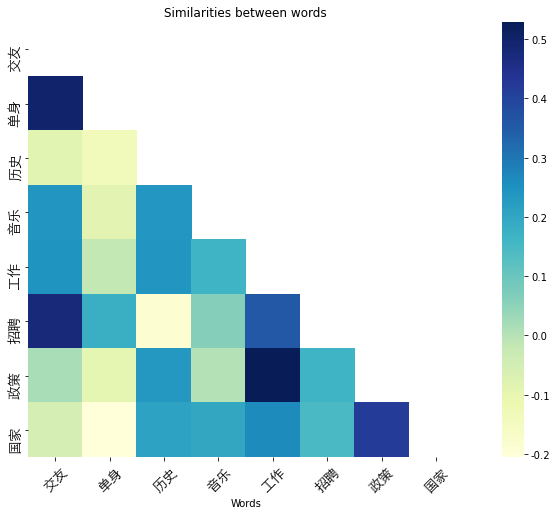

In [114]:
f, ax=plt.subplots(1, 1, figsize=(14,8))
cmap = plt.cm.YlGnBu
mask = np.zeros_like(df)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df, cmap=cmap, mask=mask, square=True, ax=ax)
_=plt.yticks(rotation=90, fontproperties=fontP)
plt.xlabel('Words')
_=plt.xticks(rotation=45, fontproperties=fontP)
_=plt.title("Similarities between words")

Project a set of words (via their 300 dimensional vector) using T-SNE

T-SNE projects high dimensional feature spaces into 2D, we can then draw each word at its 2D location and colour by similarity to a target word.

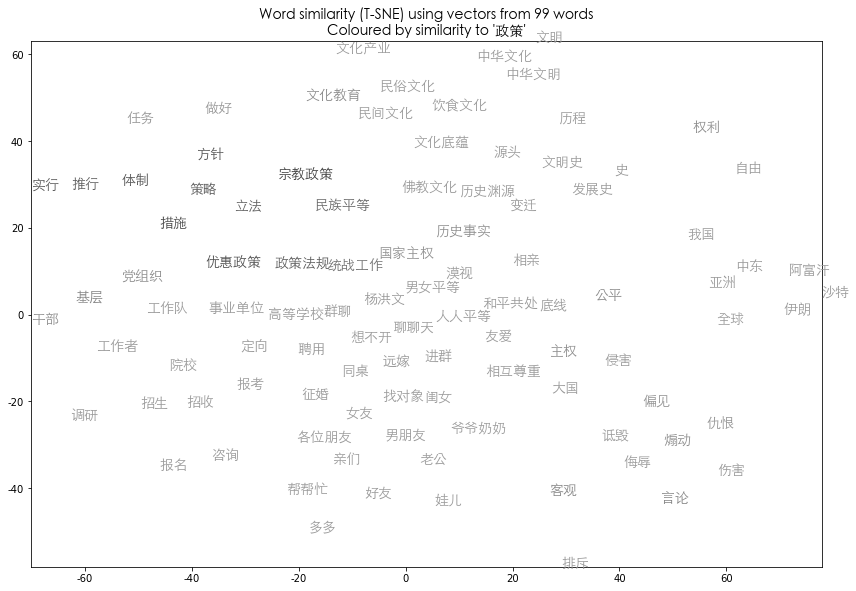

In [118]:
from sklearn.manifold import TSNE
model_wv = gensim.models.KeyedVectors.load_word2vec_format('model_0315.txt', binary=False)

raw_words_of_interest = ["交友", "单身", "历史", "文化", "工作", "招聘", "政策", "国家", "平等", "歧视"]
# some other random stuff we chould throw in...
#                    'King', 'Queen', 'person', 'walking', 'dancing', 'news', 'food', 'kitchen', 'house']

words_of_interest = []
for woi in raw_words_of_interest:
    for word, _ in model_wv.most_similar(woi):
        words_of_interest.append(word)

words_of_interest = list(set(words_of_interest))

vectors = []
for word in set(words_of_interest):
    vectors.append(model_wv[word])
    
vectors = np.vstack(vectors) # turn vectors into a 2D array <words x 300dim>

model = TSNE(n_components=2, random_state=0)
X_tsne = model.fit_transform(vectors)
df_after_tsne = pd.DataFrame.from_records(X_tsne, columns=['x', 'y'])
df_after_tsne['labels'] = words_of_interest

# calculate similarity from a target word to all words, to use as our colour
target_word = "政策"
similarities = []
for woi in words_of_interest:
    similarity = min(max(0, model_wv.similarity(target_word, woi)), 1.0)
    similarities.append(similarity)

# plot the T-SNE layout for words, darker words means more similar to our target
plt.figure(figsize=(12,8))
plt.xlim((min(X_tsne[:,0]), max(X_tsne[:,0])))
plt.ylim((min(X_tsne[:,1]), max(X_tsne[:,1])))
for idx in range(X_tsne.shape[0]):
    x, y = X_tsne[idx]
    label = words_of_interest[idx]
    color=str(min(0.6, 1.0-similarities[idx])) # convert to string "0.0".."1.0" as greyscale for mpl
    plt.annotate(s=label, xy=(x, y), color=color, fontproperties=fontP)
    #plt.annotate(s=label, xy=(x, y), weight=int(similarities[idx]*1000)) # use weight
plt.tight_layout()

_=plt.title("Word similarity (T-SNE) using vectors from {} words\nColoured by similarity to '{}'".format(len(words_of_interest), target_word), fontproperties=fontP)

In [74]:
model.most_similar([u'交友', u'相亲', u'单身', u'群聊', u'伙伴', u'联系', u'对象'], topn=30)

[('聊聊天', 0.7702953219413757),
 ('好友', 0.7550661563873291),
 ('交朋友', 0.7464706897735596),
 ('聊天', 0.7362792491912842),
 ('有缘', 0.7321991920471191),
 ('朋友', 0.7299124598503113),
 ('问候', 0.7135189771652222),
 ('贝侬', 0.7106001377105713),
 ('谈恋爱', 0.7076020240783691),
 ('小伙伴', 0.7071143388748169),
 ('62135116', 0.7058433294296265),
 ('女友', 0.7050307393074036),
 ('有意者', 0.7043792009353638),
 ('同胞们', 0.7035513520240784),
 ('亲们', 0.7030977010726929),
 ('盛情款待', 0.7017049193382263),
 ('添柴', 0.6998759508132935),
 ('群友', 0.6976639628410339),
 ('族人们', 0.6953564286231995),
 ('1496681', 0.6952254176139832),
 ('亲戚朋友', 0.693179190158844),
 ('各位朋友', 0.692894697189331),
 ('谈情说爱', 0.6896188259124756),
 ('初来乍到', 0.6895571947097778),
 ('群主', 0.6895565986633301),
 ('阿卯', 0.6892690658569336),
 ('小弟', 0.6879067420959473),
 ('18911191227', 0.6875125169754028),
 ('同行', 0.6857833862304688),
 ('纯苗', 0.6854116916656494)]

In [69]:
model.most_similar([u'有没有', u'同胞', u'在', u'省份', u'城市'], topn=20)

[('原住民', 0.6064886450767517),
 ('人群', 0.5979085564613342),
 ('大城市', 0.5939606428146362),
 ('聚居区', 0.5861649513244629),
 ('彝区', 0.5794129371643066),
 ('黔东南', 0.577846348285675),
 ('地方', 0.5749784708023071),
 ('东北', 0.5704488158226013),
 ('居民', 0.5645632147789001),
 ('山区', 0.5608732104301453),
 ('生意人', 0.5594515204429626),
 ('为数不多', 0.559381902217865),
 ('社群', 0.5560415983200073),
 ('区', 0.5536069869995117),
 ('聚居地', 0.5500494241714478),
 ('华人', 0.5497303605079651),
 ('旅游景点', 0.5473531484603882),
 ('人口众多', 0.5470801591873169),
 ('区域', 0.5453497767448425),
 ('海南', 0.5428609848022461)]

In [75]:
net = model.most_similar([u'交友', u'相亲', u'单身', u'群聊', u'伙伴', u'联系', u'对象'], topn=30)
key = []
for tup in net:
    key.append(tup[0])
key_str = ' '.join(key)
key_str

'聊聊天 好友 交朋友 聊天 有缘 朋友 问候 贝侬 谈恋爱 小伙伴 62135116 女友 有意者 同胞们 亲们 盛情款待 添柴 群友 族人们 1496681 亲戚朋友 各位朋友 谈情说爱 初来乍到 群主 阿卯 小弟 18911191227 同行 纯苗'

In [77]:
model.most_similar([u'工作', u'就业', u'招聘', u'薪资'], topn=30)

[('岗位', 0.8291712403297424),
 ('就医', 0.8015958070755005),
 ('求职', 0.795576810836792),
 ('干警', 0.7939504384994507),
 ('食宿', 0.7898610830307007),
 ('结算', 0.7870849370956421),
 ('复学', 0.7844867706298828),
 ('非大新籍', 0.7812478542327881),
 ('管理人员', 0.7803492546081543),
 ('定向', 0.7751195430755615),
 ('定点', 0.7730316519737244),
 ('劳动就业', 0.7708339691162109),
 ('贫困学生', 0.7706979513168335),
 ('上门服务', 0.7697358131408691),
 ('事业单位', 0.769509494304657),
 ('业务', 0.7680850028991699),
 ('公务员', 0.7678553462028503),
 ('短期', 0.7662819027900696),
 ('经费', 0.7646562457084656),
 ('应急', 0.7640355229377747),
 ('办案', 0.7615871429443359),
 ('职业技能', 0.759730339050293),
 ('员工', 0.7589963674545288),
 ('贷款', 0.7580018043518066),
 ('足额', 0.7558966875076294),
 ('升学', 0.7552489042282104),
 ('公益性', 0.7545095682144165),
 ('符合条件', 0.7541258931159973),
 ('伙食', 0.7508431673049927),
 ('资助', 0.7503987550735474)]

In [78]:
job = model.most_similar([u'工作', u'就业', u'招聘', u'薪资'], topn=30)
key = []
for tup in job:
    key.append(tup[0])
key_str = ' '.join(key)
key_str

'岗位 就医 求职 干警 食宿 结算 复学 非大新籍 管理人员 定向 定点 劳动就业 贫困学生 上门服务 事业单位 业务 公务员 短期 经费 应急 办案 职业技能 员工 贷款 足额 升学 公益性 符合条件 伙食 资助'

In [79]:
model.most_similar([u'文化', u'传统', u'礼仪', u'历史', u'饮食', u'歌舞', u'文物', u'旅游'], topn=30)

[('传统习俗', 0.7965496182441711),
 ('饮食文化', 0.7961481213569641),
 ('民俗', 0.7886688113212585),
 ('民俗文化', 0.7666592597961426),
 ('节庆', 0.7525231838226318),
 ('服饰文化', 0.7377957701683044),
 ('民间文化', 0.7306417226791382),
 ('丰富多彩', 0.7210999727249146),
 ('传统工艺', 0.7178955078125),
 ('民俗风情', 0.6994996070861816),
 ('元素', 0.696576714515686),
 ('原生态', 0.6931809782981873),
 ('独具特色', 0.6909688711166382),
 ('内涵', 0.689649224281311),
 ('茶文化', 0.6855010986328125),
 ('表现形式', 0.6817034482955933),
 ('佛教文化', 0.6750499606132507),
 ('传统节日', 0.6710435748100281),
 ('艺术', 0.6695229411125183),
 ('文化氛围', 0.6694507598876953),
 ('工艺品', 0.6658377051353455),
 ('事象', 0.6609712243080139),
 ('习俗', 0.6601146459579468),
 ('精华', 0.658218502998352),
 ('原汁原味', 0.6581174731254578),
 ('民族性', 0.658075213432312),
 ('独特', 0.6574584245681763),
 ('精髓', 0.6536228656768799),
 ('礼俗', 0.6533222794532776),
 ('民族风情', 0.6530379056930542)]

In [80]:
cul = model.most_similar([u'文化', u'传统', u'礼仪', u'历史', u'饮食', u'歌舞', u'文物', u'旅游'], topn=30)
key = []
for tup in cul:
    key.append(tup[0])
key_str = ' '.join(key)
key_str

'传统习俗 饮食文化 民俗 民俗文化 节庆 服饰文化 民间文化 丰富多彩 传统工艺 民俗风情 元素 原生态 独具特色 内涵 茶文化 表现形式 佛教文化 传统节日 艺术 文化氛围 工艺品 事象 习俗 精华 原汁原味 民族性 独特 精髓 礼俗 民族风情'

In [81]:
model.most_similar([u'语言', u'汉语', u'读音', u'翻译', u'姓氏'], topn=30)

[('词汇', 0.8398836851119995),
 ('汉字', 0.8344224095344543),
 ('发音', 0.825529932975769),
 ('借词', 0.8162549734115601),
 ('泰语', 0.8111833333969116),
 ('满语', 0.799425482749939),
 ('拼写', 0.7987790107727051),
 ('波斯语', 0.7917858362197876),
 ('日语', 0.788936197757721),
 ('阿拉伯语', 0.7882822751998901),
 ('标准音', 0.7838633060455322),
 ('汉语拼音', 0.7831427454948425),
 ('蒙古语', 0.7815178632736206),
 ('口语', 0.7813205718994141),
 ('毕基语', 0.780467689037323),
 ('声母', 0.7755352258682251),
 ('现代汉语', 0.7745744585990906),
 ('标准语', 0.7709400057792664),
 ('方言', 0.7697786688804626),
 ('一词', 0.7656542658805847),
 ('拼音', 0.7631771564483643),
 ('读法', 0.7600151300430298),
 ('古汉语', 0.7584617137908936),
 ('语词', 0.757257342338562),
 ('语法', 0.7568159103393555),
 ('术语', 0.7562810778617859),
 ('土语', 0.7535244226455688),
 ('英语', 0.7505066394805908),
 ('语', 0.7493932843208313),
 ('声调', 0.749076247215271)]

In [82]:
lan = model.most_similar([u'语言', u'汉语', u'读音', u'翻译', u'姓氏'], topn=30)
key = []
for tup in lan:
    key.append(tup[0])
key_str = ' '.join(key)
key_str

'词汇 汉字 发音 借词 泰语 满语 拼写 波斯语 日语 阿拉伯语 标准音 汉语拼音 蒙古语 口语 毕基语 声母 现代汉语 标准语 方言 一词 拼音 读法 古汉语 语词 语法 术语 土语 英语 语 声调'

In [70]:
model.most_similar([u'宗教', u'信仰', u'穆斯林', u'伊斯兰', u'佛教', u'清真寺'], topn=30)

[('伊斯兰教', 0.8357438445091248),
 ('基督教', 0.8034807443618774),
 ('藏传佛教', 0.7680203914642334),
 ('喇嘛教', 0.7253063321113586),
 ('道教', 0.6968480348587036),
 ('天主教', 0.6790805459022522),
 ('里教', 0.6373984813690186),
 ('黄教', 0.6313211917877197),
 ('印度教', 0.6308853626251221),
 ('什叶派', 0.6266282200813293),
 ('教义', 0.6242001056671143),
 ('信徒', 0.6212284564971924),
 ('苏菲', 0.6204134821891785),
 ('聂思脱', 0.6191493272781372),
 ('教派', 0.6116958856582642),
 ('萨满教', 0.60878986120224),
 ('犹太教', 0.6087158918380737),
 ('基督', 0.6084632873535156),
 ('信众', 0.5894340872764587),
 ('本土', 0.5860613584518433),
 ('教法', 0.5838322639465332),
 ('以庆', 0.5768593549728394),
 ('儒教', 0.5748289227485657),
 ('伊赫瓦尼', 0.5719417333602905),
 ('传播', 0.5718340277671814),
 ('巫术', 0.5667740106582642),
 ('不净面', 0.5657822489738464),
 ('教徒', 0.5643752813339233),
 ('普罗', 0.5639507174491882),
 ('萨满', 0.5585215091705322)]

In [84]:
reg = model.most_similar([u'宗教', u'信仰', u'穆斯林', u'伊斯兰', u'佛教'], topn=30)
key = []
for tup in reg:
    key.append(tup[0])
key_str = ' '.join(key)
key_str

'伊斯兰教 基督教 藏传佛教 喇嘛教 道教 天主教 教义 苏菲 黄教 里教 印度教 萨满教 什叶派 基督 教法 巫术 教派 本土 儒教 聂思脱 萨满 信徒 犹太教 犹太 宗教性 儒家文化 传播 不净面 法律 信众'

In [85]:
model.most_similar([u'管理', u'帖子', u'删帖', u'举报', u'屏蔽'], topn=30)

[('投诉', 0.8744238018989563),
 ('删除', 0.8632792234420776),
 ('务', 0.8268589377403259),
 ('加精', 0.8223142623901367),
 ('删', 0.8204439878463745),
 ('发帖', 0.8075804710388184),
 ('申诉', 0.8051726222038269),
 ('发贴', 0.7879267930984497),
 ('被删', 0.7877191305160522),
 ('违规', 0.7865816354751587),
 ('账号', 0.7824081182479858),
 ('水贴', 0.7814701795578003),
 ('黑名单', 0.7801810503005981),
 ('封禁', 0.779987096786499),
 ('爆照', 0.7765670418739319),
 ('灌水', 0.7713964581489563),
 ('ID', 0.7699483633041382),
 ('删掉', 0.7682322263717651),
 ('回贴', 0.7680102586746216),
 ('跟帖', 0.7672677040100098),
 ('删贴', 0.7662065029144287),
 ('权限', 0.7639002799987793),
 ('置顶', 0.7617589235305786),
 ('请勿', 0.7575583457946777),
 ('帐号', 0.7543002367019653),
 ('网特', 0.751259446144104),
 ('小号', 0.7411525249481201),
 ('管理员', 0.7388606667518616),
 ('黑壮', 0.7343064546585083),
 ('私信', 0.731473445892334)]

In [86]:
adm = model.most_similar([u'管理', u'帖子', u'删帖', u'举报', u'屏蔽'], topn=30)
key = []
for tup in adm:
    key.append(tup[0])
key_str = ' '.join(key)
key_str

'投诉 删除 务 加精 删 发帖 申诉 发贴 被删 违规 账号 水贴 黑名单 封禁 爆照 灌水 ID 删掉 回贴 跟帖 删贴 权限 置顶 请勿 帐号 网特 小号 管理员 黑壮 私信'

In [89]:
model.most_similar([u'高考', u'加分', u'优惠', u'汉化', u'政策', u'户口', u'身份证'], topn=30)

[('待遇', 0.7361011505126953),
 ('减免', 0.7240546941757202),
 ('教育经费', 0.7179166078567505),
 ('考生', 0.7068114280700684),
 ('支付', 0.7037944793701172),
 ('优惠政策', 0.7011805772781372),
 ('变更', 0.6983613967895508),
 ('计划生育', 0.6949143409729004),
 ('公务员', 0.6932642459869385),
 ('补助', 0.6904730796813965),
 ('津贴', 0.6901949644088745),
 ('财政', 0.6886606216430664),
 ('录取', 0.6884300112724304),
 ('填报', 0.6802277565002441),
 ('登记', 0.6749416589736938),
 ('社保', 0.6739252805709839),
 ('额度', 0.6727755069732666),
 ('医疗保险', 0.6725972294807434),
 ('工伤保险', 0.6689979434013367),
 ('保障机制', 0.668339729309082),
 ('成份', 0.6653181314468384),
 ('工资', 0.6643798351287842),
 ('税收', 0.6632500886917114),
 ('分数线', 0.6609509587287903),
 ('名额', 0.6598962545394897),
 ('专项资金', 0.657689094543457),
 ('升学', 0.6534098386764526),
 ('中考', 0.6522703170776367),
 ('保险', 0.6522492170333862),
 ('预科', 0.6511293649673462)]

In [90]:
pol = model.most_similar([u'高考', u'加分', u'优惠', u'汉化', u'政策', u'户口', u'身份证'], topn=30)
key = []
for tup in pol:
    key.append(tup[0])
key_str = ' '.join(key)
key_str

'待遇 减免 教育经费 考生 支付 优惠政策 变更 计划生育 公务员 补助 津贴 财政 录取 填报 登记 社保 额度 医疗保险 工伤保险 保障机制 成份 工资 税收 分数线 名额 专项资金 升学 中考 保险 预科'

In [26]:
model.most_similar([u'通婚', u'汉化'], topn=20)

[('同化', 0.7756267189979553),
 ('汉人', 0.7592999935150146),
 ('汉族人', 0.7479702234268188),
 ('汉族', 0.7252729535102844),
 ('外族', 0.724564254283905),
 ('排斥', 0.7002338171005249),
 ('满人', 0.6927922368049622),
 ('分化', 0.6729522943496704),
 ('苗瑶', 0.6679182648658752),
 ('汉满', 0.6664175987243652),
 ('血统', 0.6662289500236511),
 ('歧视', 0.6627979278564453),
 ('满汉', 0.6622614860534668),
 ('误解', 0.6506624221801758),
 ('淡化', 0.6503340005874634),
 ('于汉族', 0.6413879990577698),
 ('黑彝', 0.6407108306884766),
 ('土著', 0.6351139545440674),
 ('客家', 0.6345434188842773),
 ('抵触', 0.6322675943374634)]

In [25]:
model.most_similar([u'汉授', u'教育', u'双语'], topn=20)

[('民汉', 0.7791188359260559),
 ('壮汉', 0.776944637298584),
 ('教学', 0.7733701467514038),
 ('中等职业', 0.7492953538894653),
 ('中小学', 0.7405974268913269),
 ('技术学校', 0.7302515506744385),
 ('教学内容', 0.7275452613830566),
 ('寄宿制', 0.7253461480140686),
 ('高等教育', 0.7236396074295044),
 ('国民教育', 0.7201539278030396),
 ('课程', 0.7194031476974487),
 ('学校', 0.7183358073234558),
 ('预科', 0.7162877917289734),
 ('扫盲', 0.7071271538734436),
 ('并授', 0.7042986750602722),
 ('学前教育', 0.7004748582839966),
 ('公办', 0.7001495957374573),
 ('摈绝', 0.6952581405639648),
 ('教材', 0.6949830055236816),
 ('分中乐课', 0.6936733722686768)]

In [22]:
model.most_similar([u'信任', u'陌生人', u'社会'], topn=20)

[('敌意', 0.7659192085266113),
 ('普通人', 0.7219109535217285),
 ('偏见', 0.7184256315231323),
 ('恐惧', 0.7101327776908875),
 ('渴望', 0.7050700187683105),
 ('误解', 0.7000601887702942),
 ('危机感', 0.698381781578064),
 ('体谅', 0.6983537673950195),
 ('个体', 0.6955462098121643),
 ('良知', 0.691878080368042),
 ('压抑', 0.6898977756500244),
 ('自卑', 0.6891674995422363),
 ('信赖', 0.686985969543457),
 ('同情', 0.6865074634552002),
 ('愿望', 0.6862630844116211),
 ('意愿', 0.6853832006454468),
 ('公正', 0.6822763085365295),
 ('无知', 0.6799494624137878),
 ('谩骂', 0.6782379150390625),
 ('漠视', 0.6774149537086487)]

In [42]:
model.most_similar([u'歧视', u'不公', u'平等', u'公平'], topn=20)

[('损害', 0.8030145764350891),
 ('侵害', 0.7921841144561768),
 ('言论自由', 0.7910552620887756),
 ('公正', 0.7902331352233887),
 ('傲慢', 0.782585620880127),
 ('妨碍', 0.7798455953598022),
 ('干涉', 0.779366135597229),
 ('偏见', 0.775087833404541),
 ('容忍', 0.7714537382125854),
 ('侵犯', 0.7698417901992798),
 ('干预', 0.7548118829727173),
 ('仇外', 0.7517039179801941),
 ('阶级', 0.7513506412506104),
 ('权利', 0.7487491369247437),
 ('人权', 0.7444469928741455),
 ('暴力', 0.7440806031227112),
 ('在政治上', 0.7430325746536255),
 ('干扰', 0.7428209185600281),
 ('自私', 0.7410950660705566),
 ('违反', 0.7397770881652832)]

In [58]:
equ = model.most_similar([u'歧视', u'不公', u'平等', u'公平'], topn=20)
key = []
for tup in equ:
    key.append(tup[0])
key_str = ' '.join(key)
key_str  

'损害 侵害 言论自由 公正 傲慢 妨碍 干涉 偏见 容忍 侵犯 干预 仇外 阶级 权利 人权 暴力 在政治上 干扰 自私 违反'

In [34]:
model.most_similar([u'经济', u'发展'], topn=20)

[('旅游业', 0.756259024143219),
 ('转型', 0.7521616816520691),
 ('经济基础', 0.7102255821228027),
 ('蓬勃发展', 0.7068313360214233),
 ('一体化', 0.7052083015441895),
 ('多元化', 0.6996496319770813),
 ('农业', 0.6966058015823364),
 ('城市化', 0.6926401853561401),
 ('产业', 0.689659833908081),
 ('商业', 0.6868494749069214),
 ('工业', 0.6841104030609131),
 ('稳定', 0.6807960867881775),
 ('繁荣', 0.679839015007019),
 ('生产力', 0.676577091217041),
 ('经济社会', 0.6700799465179443),
 ('发展趋势', 0.6697244048118591),
 ('产业化', 0.6674947738647461),
 ('市场经济', 0.6660891175270081),
 ('推动', 0.6648008823394775),
 ('迅猛发展', 0.6616961359977722)]

In [57]:
model.most_similar([u'政策', u'偏斜', u'优惠'], topn=20)

[('贴息贷款', 0.7987306118011475),
 ('保障机制', 0.7957897782325745),
 ('教育经费', 0.7889771461486816),
 ('各项政策', 0.769890308380127),
 ('市场准入', 0.7681676149368286),
 ('贴息', 0.7651009559631348),
 ('开发式', 0.7596575021743774),
 ('免税', 0.7585335969924927),
 ('财政', 0.7584813237190247),
 ('全面落实', 0.7510310411453247),
 ('额度', 0.750419020652771),
 ('优惠政策', 0.7491804957389832),
 ('小额', 0.7491470575332642),
 ('特殊政策', 0.7474991083145142),
 ('减税', 0.7462542653083801),
 ('支付', 0.7437348961830139),
 ('保险', 0.7411901950836182),
 ('信贷', 0.7403538227081299),
 ('存量', 0.7379332780838013),
 ('财政资金', 0.7372958660125732)]

In [36]:
model.most_similar([u'爱国', u'支持'], topn=20)

[('拥护', 0.7553759217262268),
 ('热爱祖国', 0.7149593830108643),
 ('爱教', 0.71355140209198),
 ('号召', 0.6919293403625488),
 ('宗教界', 0.6915949583053589),
 ('关心', 0.6880236268043518),
 ('鼓励', 0.6850118041038513),
 ('激励', 0.6814583539962769),
 ('党和政府', 0.6811303496360779),
 ('决心', 0.6681566834449768),
 ('呼吁', 0.6573241949081421),
 ('抗日', 0.6527689099311829),
 ('社会各界', 0.6516213417053223),
 ('大力', 0.6505783796310425),
 ('领导', 0.6470986604690552),
 ('倡导', 0.6462891101837158),
 ('抗日救国', 0.6453698873519897),
 ('统一战线', 0.6442539691925049),
 ('爱国热情', 0.6440053582191467),
 ('倡议', 0.6426523923873901)]

In [37]:
model.most_similar([u'民族主义', u'极端'], topn=20)

[('狭隘', 0.8562518358230591),
 ('暴力', 0.8459681272506714),
 ('激进', 0.8412971496582031),
 ('极端主义', 0.8327444791793823),
 ('主义', 0.8284639716148376),
 ('排外', 0.8188135623931885),
 ('恐怖主义', 0.8042182326316833),
 ('种族主义', 0.7951745390892029),
 ('大汉族主义', 0.7871595621109009),
 ('煽动', 0.7844212651252747),
 ('反对', 0.7750224471092224),
 ('意识形态', 0.7732423543930054),
 ('主义者', 0.7690705060958862),
 ('抵制', 0.768589437007904),
 ('无神论', 0.7630839347839355),
 ('鼓吹', 0.7577841281890869),
 ('民粹主义', 0.7538220286369324),
 ('仇恨', 0.7492782473564148),
 ('对立', 0.7387108206748962),
 ('分裂', 0.7384217381477356)]

In [40]:
model.most_similar([u'阶级', u'等级', u'同龄', u'家庭'], topn=20)

[('家庭成员', 0.742263674736023),
 ('家支', 0.733539879322052),
 ('近亲', 0.7312502264976501),
 ('个体', 0.721171498298645),
 ('一夫一妻', 0.7012529373168945),
 ('婚姻关系', 0.6961199045181274),
 ('阶层', 0.696008563041687),
 ('性别', 0.6835164427757263),
 ('劳动者', 0.6806616187095642),
 ('畸形', 0.6755738854408264),
 ('配偶', 0.6711097955703735),
 ('婚配', 0.6665779948234558),
 ('权力', 0.666054368019104),
 ('所有制', 0.6632201671600342),
 ('权利', 0.6631977558135986),
 ('政教合一', 0.6624903678894043),
 ('旧社会', 0.6573402285575867),
 ('国家机器', 0.6542381644248962),
 ('领主', 0.6484299302101135),
 ('生育', 0.6473580002784729)]

In [41]:
model.most_similar([u'快乐', u'烦恼', u'生活'], topn=20)

[('轻松', 0.7540234923362732),
 ('温暖', 0.7434982657432556),
 ('幸福', 0.7291544675827026),
 ('乐趣', 0.7264363765716553),
 ('心情', 0.7189244031906128),
 ('痛苦', 0.7137347459793091),
 ('渴望', 0.7079591155052185),
 ('打拼', 0.7040586471557617),
 ('盼望', 0.6988410353660583),
 ('悲伤', 0.6961915493011475),
 ('迷茫', 0.6959624290466309),
 ('甜蜜', 0.6947835683822632),
 ('幸福生活', 0.6939184665679932),
 ('喜悦', 0.6883238554000854),
 ('美好', 0.6857039928436279),
 ('内心', 0.6845506429672241),
 ('慰藉', 0.6824608445167542),
 ('愉快', 0.6801952719688416),
 ('向往', 0.6798996329307556),
 ('千金难买', 0.6760822534561157)]

In [52]:
institution = model.most_similar([u'政府', u'法院', u'领导'], topn=20)

In [53]:
key = []
for tup in institution:
    key.append(tup[0])

In [56]:
key_str = ' '.join(key)
key_str

'上级 政府部门 各级 党委政府 党组织 执行 文化部门 中国政府 州政府 国民政府 党委 部门 监督 党政领导 领导班子 主管部门 省政府 当局 当地政府 工作人员'

In [119]:
# coding=utf8
import re
from pyhanlp import *
from msr import msr_train
from test_utility import test_data_path
import csv
import pandas as pd
import os
import time

IOUtil = JClass('com.hankcs.hanlp.corpus.io.IOUtil')
DocVectorModel = JClass('com.hankcs.hanlp.mining.word2vec.DocVectorModel')
Word2VecTrainer = JClass('com.hankcs.hanlp.mining.word2vec.Word2VecTrainer')
WordVectorModel = JClass('com.hankcs.hanlp.mining.word2vec.WordVectorModel')
TRAIN_FILE_NAME = msr_train
# MODEL_FILE_NAME = os.path.abspath('model0315.txt')
MODEL_FILE_NAME = os.path.abspath('model_0315.txt')

In [120]:
def cut_para(content):
    end_flag = ['\n']
    content_len = len(content)
    sentences = []
    tmp_char = ''
    for idx, char in enumerate(content):
        tmp_char += char
        if (idx + 1) == content_len:
            sentences.append(tmp_char)
            break
        if char in end_flag:
            next_idx = idx + 1
            if not content[next_idx] in end_flag:
                sentences.append(tmp_char)
                tmp_char = ''
    return sentences

def print_nearest(word, model):
    print(
        "\n                                                Word     "
        "Cosine\n------------------------------------------------------------------------")
    for entry in model.nearest(word):
        print("%50s\t\t%f" % (entry.getKey(), entry.getValue()))

def print_nearest_document(document, documents, model):
    print_header(document)
    for entry in model.nearest(document):
        print("%50s\t\t%f" % (documents[entry.getKey()], entry.getValue()))

def print_header(query):
    print(
        "\n%50s          Cosine\n------------------------------------------------------------------------" % (query))

def train_or_load_model():
    if not IOUtil.isFileExisted(MODEL_FILE_NAME):
        if not IOUtil.isFileExisted(TRAIN_FILE_NAME):
            raise RuntimeError("语料不存在，请阅读文档了解语料获取与格式：https://github.com/hankcs/HanLP/wiki/word2vec")
        trainerBuilder = Word2VecTrainer();
         #trainerBuilder = Word2VecTrainer.setLayerSize(300);
        return trainerBuilder.train(TRAIN_FILE_NAME, MODEL_FILE_NAME)
    return load_model()

def load_model():
    return WordVectorModel(MODEL_FILE_NAME)

In [71]:
work = pd.read_csv('label5.csv', error_bad_lines=False)

In [50]:
work.columns =['id','content', 'catid', 'cat', 'ethnic']

In [72]:
work

,content,cat_label
0,从古籍看土家族之“蛮人” 从古籍看土家族之“蛮人” 本帖资料来源：《百苗图抄本汇编》杨庭硕/...,culture
1,从古籍看土家族之《苗防备览》 本帖资料来源：《苗防备览第九卷》清朝后期，作者严如熤（1759...,culture
2,从古籍看土家族之《楚南苗志》 本帖资料来源：《楚南苗志卷六<土志>》湖北巡抚采进本，清朝段汝...,culture
3,湖南世居少数民族之土家族篇 资料来源：湘西州民宗委网站http://mw.xxz.gov.c...,culture
4,土家族牛头宴 资料来源：湘西州民宗委网站http://mw.xxz.gov.cn/mzzs/...,culture
...,...,...
693,秦朝时期的西瓯与东瓯是否为一群人迁移两地？ “瓯”表示什么意思，是不是取自古越语音译，今天的...,language
694,求问老师 乡村振兴工作局怎么翻译呢,language
695,不说空话，就问你们谁看过一篇壮文短篇小说！ Mbouj gangj vahndwi，couh...,culture
696,这些粤语地名与壮侗语有关吗？ 这些粤语地名与壮侗语有关吗？漖和滘，广州有很多这样的地名，上漖...,language


For a try:

In [63]:
length = len(work['content'])
# change this: textnum+1
a = [[''for i in range(3)]for j in range(length)]
wordVectorModel = train_or_load_model()
docVectorModel = DocVectorModel(wordVectorModel)

In [59]:
content_text1 = '政府 法院 领导 上级 政府部门 各级 党委政府 党组织 执行 文化部门 中国政府 州政府 国民政府 党委 部门 监督 党政领导 领导班子 主管部门 省政府 当局 当地政府 工作人员'
content_text2 = '歧视 不公 公平 损害 侵害 言论自由 公正 傲慢 妨碍 干涉 偏见 容忍 侵犯 干预 仇外 阶级 权利 人权 暴力 在政治上 干扰 自私 违反'

In [64]:
for i in range(length):
    a[i][0] = work['content'][i]
    a[i][1] = docVectorModel.similarity(a[i][0], str(content_text1))
    a[i][2] = docVectorModel.similarity(a[i][0], str(content_text2))

In [65]:
res_df = pd.DataFrame({'content': [c[0] for c in a], 'institution': [c[1] for c in a], 'equality': [c[2] for c in a]})

In [66]:
res_df

,content,institution,equality
0,从古籍看土家族之“蛮人” 从古籍看土家族之“蛮人” 本帖资料来源：《百苗图抄本汇编》杨庭硕/...,-0.171136,-0.129283
1,从古籍看土家族之《苗防备览》 本帖资料来源：《苗防备览第九卷》清朝后期，作者严如熤（1759...,-0.296893,-0.176133
2,从古籍看土家族之《楚南苗志》 本帖资料来源：《楚南苗志卷六<土志>》湖北巡抚采进本，清朝段汝...,-0.017548,-0.174397
3,湖南世居少数民族之土家族篇 资料来源：湘西州民宗委网站http://mw.xxz.gov.c...,-0.363590,-0.106320
4,土家族牛头宴 资料来源：湘西州民宗委网站http://mw.xxz.gov.cn/mzzs/...,-0.163881,-0.037134
...,...,...,...
693,秦朝时期的西瓯与东瓯是否为一群人迁移两地？ “瓯”表示什么意思，是不是取自古越语音译，今天的...,-0.314196,0.144424
694,求问老师 乡村振兴工作局怎么翻译呢,0.009418,-0.050240
695,不说空话，就问你们谁看过一篇壮文短篇小说！ Mbouj gangj vahndwi，couh...,-0.240426,-0.009323
696,这些粤语地名与壮侗语有关吗？ 这些粤语地名与壮侗语有关吗？漖和滘，广州有很多这样的地名，上漖...,-0.273406,0.116799


In [67]:
res_df.to_excel("res_df.xlsx")

Use our set of keywords:

In [73]:
work['content'] = work['content'].str.replace('NA', '')
work['content'] = work['content'].str.replace('点击展开', '')
work['content'] = work['content'].str.replace('查看完整图片', '')
work['content'] = work['content'].str.replace('图片来自微信公众号', '')
work['content'] = work['content'].str.replace('视频来自百度贴吧', '')
work['content'] = work['content'].str.replace('转载自微信公众号', '')
work['content'] = work['content'].str.replace('以上图片均来自于网络，侵权删', '')
work['content'] = work['content'].str.replace('免责声明', '')
work['content'] = work['content'].str.replace('本文文图来自', '')
work['content'] = work['content'].str.replace('网页链接', '')
work['content'] = work['content'].str.replace('如侵权请通知删除', '')
work['content'] = work['content'].str.replace('本文来自', '')
work['content'] = work['content'].str.replace('视频来自：百度贴吧', '')
work['content'] = work['content'].str.replace('我发表了一篇视频贴，大伙来看看吧', '')

In [51]:
def remove_punctuation(line):
    line = str(line)
    if line.strip()=='':
        return ''
    rule = re.compile(u"[^a-zA-Z0-9\u4E00-\u9FA5]")
    line = rule.sub('',line)
    return line

In [74]:
import re
work['content'] = work['content'].apply(remove_punctuation)

In [75]:
work

,content,cat_label
0,从古籍看土家族之蛮人从古籍看土家族之蛮人本帖资料来源百苗图抄本汇编杨庭硕潘盛之编著贵州人民出...,culture
1,从古籍看土家族之苗防备览本帖资料来源苗防备览第九卷清朝后期作者严如熤17591826清地理学...,culture
2,从古籍看土家族之楚南苗志本帖资料来源楚南苗志卷六土志湖北巡抚采进本清朝段汝霖撰汝霖字时斋号梅...,culture
3,湖南世居少数民族之土家族篇资料来源湘西州民宗委网站httpmwxxzgovcnmzzs201...,culture
4,土家族牛头宴资料来源湘西州民宗委网站httpmwxxzgovcnmzzs201406t201...,culture
...,...,...
693,秦朝时期的西瓯与东瓯是否为一群人迁移两地瓯表示什么意思是不是取自古越语音译今天的西瓯人直系后...,language
694,求问老师乡村振兴工作局怎么翻译呢,language
695,不说空话就问你们谁看过一篇壮文短篇小说Mboujgangjvahndwicouhcamsou...,culture
696,这些粤语地名与壮侗语有关吗这些粤语地名与壮侗语有关吗漖和滘广州有很多这样的地名上漖夏下滘沥滘...,language


In [76]:
length = len(work['content'])
# change this: textnum+1
a = [[''for i in range(9)]for j in range(length)]
wordVectorModel = train_or_load_model()
docVectorModel = DocVectorModel(wordVectorModel)

In [77]:
content_text1 = '相亲 小哥哥  朋友 征婚  交友 结婚  对象  婚嫁 小姐姐 寻缘 有缘 年龄 身高 姻缘 岁 谈恋爱 外貌 性格 合适 单身 上学 群 玩耍 大学 爱心 群聊 进群 拉群 拉我 加好友 聚餐  喜欢 勤俭节约 联系方式 平台 初来乍到 嫁 qq 微信 联系 组队 旅游 私信 私我 交流 城市 省份 有没有'
content_text2 = '工作 食堂 劳工 厂 薪资 岗位 福利 介绍 工地 吃住 暑假工 临时工 长期工 普工 企业 人力资源 签约  招聘 公司 同胞 需要 员工 人力资源 寒假 不限 安排 工资 提供 毕业生 薪资 面试 企业 包吃 原件 合作 应聘 时间 标准 科技 上班 专业 劳务 包吃 包住 发放 小时 店面 干活 生意 联系 商品 卖 运营 商业 兼职 价格 私聊 采购 业务 低价 出售 求购 淘宝'
content_text3 = '[提问 学习 请教 交流 指导 朋友 兄弟 同胞 朋友 回回 色目] [弘扬 文化 传统 朵斯 风俗 礼仪] [衣着 衣服 服装 服饰 饰品] [衣服 服装 蒙古袍 服饰 饰品 发髻 绣花 裙子 腰带] [古歌 古词 民间 文学 史诗 诗歌 吟诵 散文 传说 故事 神话 叙事][乐器 演艺界 曲艺界 体育 演员 歌手 明星 电影 电视剧] [音乐 歌名 歌词 歌曲 民歌 民谣 唱歌 对唱 回语歌曲 摇滚 影视 好看 好听 舞台 演唱 谱曲 器乐 管弦 舞蹈 戏曲 演艺 斗牛] [刺绣 织锦 花纹 漆器 手工 工艺 剪纸 铜炉 文物 收藏 博物馆 陈设 瑰宝] ][出嫁 回门 定亲 提亲 娘家 新娘 红白喜事 满月 饮酒 独特 [武术 格斗术] [手工 工艺 剪纸 阿文炉 文物 收藏 竞技 陈设 传世 标识 宝物 瑰宝 武术 经堂 建筑 丧葬 白布 葬礼 文化遗产 天文 科学 药方 中药 医学]  [吃饭 吃 晚餐 牛 清真 水果 食品 食物 做饭 烹饪 制作 牛肉 拉面 羊肉 手抓饭 凉皮 馓子 馃馃 汉餐 烤肠 蘑菇 猪肉 海鲜 火锅 血液 生鲜 牛骨 苹果] [军人 立功 战斗 英雄 子弟兵 军区 回民支队 英雄 抗美援朝 抗日 将士 支队 中国 红]  [先祖 血统 突厥 羌族 蒙古 阿拉伯  大月氏 哈萨克 东干人 维吾尔 伊朗 鞑靼 巴勒斯坦 xj Farsi 迈赫尔节 迪拜 波斯语 纳吾鲁孜节 阿联酋 叙利亚 中亚 波斯 东干人 伊朗 塔吉克] [通史 史稿 历史 唐朝 突厥 汗国 两宋 元代 成吉思汗 西征 回军 明代 胡语 胡服 后裔 起义 清朝 游牧 皇帝 灭亡 官员 民国 知名人物 名人 先民 民族英雄 后来 当代 ] [回族人口 增长 变化 分布 省份 行政区 总人口 聚居 族群 分类 密切 ] [经济 货币 发展 时期] 波斯 回商 丝绸之路 乌兹别克 土库曼斯坦] [地区 地方 地点 风景 名胜 地貌 古迹 旅游 新疆 西域] [部队 军区 游牧民族 撒马尔罕关系 美国 日本 俄罗斯 苏联 欧洲 学者 影响] [奶奶 母亲 爸爸 爷爷 家里 祖先 祖籍 后人 家谱 家族 长相 鼻子 眼睛 胡子 家庭 来自 遗传 基因 后裔 血统 血缘 认同][照片 资料 拍照 报告 文献 文章 论文]'
content_text4 = '[讨论 请教 交流] [语言 汉语 回语 文字 汉语 拼音 翻译 意思 读音 翻译 输入法 原意 土俗字] [姓氏 姓名 起名 谐音][方言 俚语 声母 韵母 声调]'
content_text5 = '宗教 信仰 仪式 建筑 清真寺 清净寺 穆斯林 伊斯兰 伊斯兰教 回教 阿訇 斋月 过斋月 齋戒月 禁月 善月 斋戒 佛教 封斋 圣洁 小儿锦 礼拜 圣行 白色 白帽 帽子 头巾 真主 安拉 古兰经 古尔邦节 宰牲节 经名 朵斯节 宰牲节 胡达 阿卜杜勒 真主 生命 仆人 古兰经 沙甸 天方 哈丁 祷告 纳家营 穆罕默德 乌合之众 群众运动 恐怖袭击 妇女 解放 色兰 主麻吉庆 聚礼'
content_text6 = '本吧 主题 帖子 不要讨论政治 管理 通知 吧务 吧规 吧主 招募 造谣抹黑 删帖 封禁 申请 解封 封号 屏蔽回帖 回族 在线 发言  爆照 删帖 删除 曝光 管理 赞成 友们 发帖 帖子 本人 百度 维护 违规 问题 黑子 主题 举报 封禁 建设 报道 攻击 注意 管理权限 严格遵守 模范带头 公安部门 沟通 交流 素质 规定 专用贴 人员 信息 冲突'
content_text7 = '高考 加分 考学 照顾 优先 录取 政策 小孩 优惠 政策 成分 通婚 签证 护照 通婚 语言 差异 汉化 聚居 回语 回文 文字 汉语 人口统计 双语教学 汉语授课 民族语言教育 民族关系 区域自治 回授 教育 双语 身份证 户口 自治 官员 特殊 干部 独立 立法 政府 法律 普查 计划 生育 压迫 反党 爱国 当局 歧视 不公 公平 优惠政策 特殊政策 阶级 权力'


In [29]:
content_text1 = '相亲 对象 交友 对象 联系 聊聊天 好友 交朋友 聊天 有缘 朋友 问候 贝侬 谈恋爱 小伙伴 女友 有意者 同胞们 亲们 盛情款待 添柴 群友 族人们 亲戚朋友 各位朋友 谈情说爱 初来乍到 群主 阿卯 小弟 同行 纯苗'
content_text2 = '工作 就业 招聘 薪资 岗位 就医 求职 干警 食宿 结算 复学 非大新籍 管理人员 定向 定点 劳动就业 贫困学生 上门服务 事业单位 业务 公务员 短期 经费 应急 办案 职业技能 员工 贷款 足额 升学 公益性 符合条件 伙食 资助'
content_text3 = '文化, 传统, 礼仪, 历史, 饮食, 歌舞, 文物, 旅游 传统习俗 饮食文化 民俗 民俗文化 节庆 服饰文化 民间文化 丰富多彩 传统工艺 民俗风情 元素 原生态 独具特色 内涵 茶文化 表现形式 佛教文化 传统节日 艺术 文化氛围 工艺品 事象 习俗 精华 原汁原味 民族性 独特 精髓 礼俗 民族风情'
content_text4 = '语言 汉语 读音 翻译 姓氏 词汇 汉字 发音 借词 泰语 满语 拼写 波斯语 日语 阿拉伯语 标准音 汉语拼音 蒙古语 口语 毕基语 声母 现代汉语 标准语 方言 一词 拼音 读法 古汉语 语词 语法 术语 土语 英语 语 声调'
content_text5 = '宗教 信仰 穆斯林 佛教 伊斯兰教 基督教 藏传佛教 喇嘛教 道教 天主教 教义 苏菲 黄教 里教 印度教 萨满教 什叶派 基督 教法 巫术 教派 本土 儒教 聂思脱 萨满 信徒 犹太教 犹太 宗教性 儒家文化 传播 不净面 法律 信众'
content_text6 = '管理 帖子 删帖 屏蔽 举报 拉黑 投诉 删除 务 加精 删 发帖 申诉 发贴 被删 违规 账号 水贴 黑名单 封禁 爆照 灌水 ID 删掉 回贴 跟帖 删贴 权限 置顶 请勿 帐号 网特 小号 管理员 黑壮 私信'
content_text7 = '高考 加分 优惠 汉化 政策 待遇 减免 教育经费 考生 支付 优惠政策 变更 计划生育 公务员 补助 津贴 财政 录取 填报 登记 社保 额度 医疗保险 工伤保险 保障机制 成份 工资 税收 分数线 名额 专项资金 升学 中考 保险 预科'

In [78]:
for i in range(length):
    a[i][0] = work['content'][i]
    a[i][1] = docVectorModel.similarity(a[i][0], str(content_text1))
    a[i][2] = docVectorModel.similarity(a[i][0], str(content_text2))
    a[i][3] = docVectorModel.similarity(a[i][0], str(content_text3))
    a[i][4] = docVectorModel.similarity(a[i][0], str(content_text4))
    a[i][5] = docVectorModel.similarity(a[i][0], str(content_text5))
    a[i][6] = docVectorModel.similarity(a[i][0], str(content_text6))
    a[i][7] = docVectorModel.similarity(a[i][0], str(content_text7))
    a[i][8] = work['cat_label'][i]

In [79]:
res_df = pd.DataFrame({'content': [c[0] for c in a], 'networking': [c[1] for c in a], 'job': [c[2] for c in a],'culture': [c[3] for c in a], 'language': [c[4] for c in a], 'religion': [c[5] for c in a], 'admin': [c[6] for c in a], 'policy': [c[7] for c in a], 'cat_label': [c[8] for c in a]})

In [80]:
res_df.to_csv("res_old_new_3.csv")

On the whole dataset:

In [135]:
work = pd.read_csv('total_posts.csv', error_bad_lines=False)

In [136]:
work['content'] = work['content'].str.replace('NA', '')
work['content'] = work['content'].str.replace('点击展开', '')
work['content'] = work['content'].str.replace('查看完整图片', '')
work['content'] = work['content'].str.replace('图片来自微信公众号', '')
work['content'] = work['content'].str.replace('视频来自百度贴吧', '')
work['content'] = work['content'].str.replace('转载自微信公众号', '')
work['content'] = work['content'].str.replace('以上图片均来自于网络，侵权删', '')
work['content'] = work['content'].str.replace('免责声明', '')
work['content'] = work['content'].str.replace('本文文图来自', '')
work['content'] = work['content'].str.replace('网页链接', '')
work['content'] = work['content'].str.replace('如侵权请通知删除', '')
work['content'] = work['content'].str.replace('本文来自', '')
work['content'] = work['content'].str.replace('视频来自：百度贴吧', '')
work['content'] = work['content'].str.replace('我发表了一篇视频贴，大伙来看看吧', '')
work['content'] = work['content'].str.replace('我发表了一篇图片贴，大伙来看看吧', '')

In [123]:
def remove_punctuation(line):
    line = str(line)
    if line.strip()=='':
        return ''
    rule = re.compile(u"[^a-zA-Z0-9\u4E00-\u9FA5]")
    line = rule.sub('',line)
    return line

In [137]:
import re
work['content'] = work['content'].apply(remove_punctuation)

In [138]:
work

,ethnic,content
0,Tujia,教你如何识别苗族谎言一为什么说土家族是汉族教你识别苗族谎言二潘光旦教授到底说了什么苗族吧的经...
1,Tujia,做了三次基因检测三次的差别都好大我身份证上是土家族我奶奶是土家族但是我不会说土家族语言我外婆...
2,Tujia,是这个土家族吗是这个土家族吗
3,Tujia,老调重弹土家族土司简史国中之国
4,Tujia,老调重弹土家族土司简史国中之国鄂西南的土司政权元朝这里主要有散毛府至元二十年四月置1283年...
...,...,...
47260,Yi,彝族求讨论阿咪这个词的具体意思刘志一教授说古彝文和古越文已有9千年历史远远早于甲骨文等世界其...
47261,Yi,彝族果基拉兹沈柯宇说你体育不及格你搞什么搞啊有点疑问南诏真的属于彝族么有没有系统的答案曾在大...
47262,Yi,贷款彝族年的时候吃的这种烧烤把所有食材放到大盆里放上料搅拌然后烤那个料是什么啥料啊不就青油辣椒吗
47263,Yi,彝族当下凉山彝族诗歌的内忧外患弟兄们都别胡乱讨论我族的历史了我族和汉族同样古老看汉语史书就有...


In [139]:
length = len(work['content'])
# change this: textnum+1
a = [[''for i in range(9)]for j in range(length)]
wordVectorModel = train_or_load_model()
docVectorModel = DocVectorModel(wordVectorModel)

In [131]:
content_text1 = '相亲 小哥哥  朋友 征婚  交友 结婚  对象  婚嫁 小姐姐 寻缘 有缘 年龄 身高 姻缘 岁 谈恋爱 外貌 性格 合适 单身 上学 群 玩耍 大学 爱心 群聊 进群 拉群 拉我 加好友 聚餐  喜欢 勤俭节约 联系方式 平台 初来乍到 嫁 qq 微信 联系 组队 旅游 私信 私我 交流 城市 省份 有没有'
content_text2 = '工作 食堂 劳工 厂 薪资 岗位 福利 介绍 工地 吃住 暑假工 临时工 长期工 普工 企业 人力资源 签约  招聘 公司 同胞 需要 员工 人力资源 寒假 不限 安排 工资 提供 毕业生 薪资 面试 企业 包吃 原件 合作 应聘 时间 标准 科技 上班 专业 劳务 包吃 包住 发放 小时 店面 干活 生意 联系 商品 卖 运营 商业 兼职 价格 私聊 采购 业务 低价 出售 求购 淘宝'
content_text3 = '[提问 学习 请教 交流 指导 朋友 兄弟 同胞 朋友 回回 色目] [弘扬 文化 传统 朵斯 风俗 礼仪] [衣着 衣服 服装 服饰 饰品] [衣服 服装 蒙古袍 服饰 饰品 发髻 绣花 裙子 腰带] [古歌 古词 民间 文学 史诗 诗歌 吟诵 散文 传说 故事 神话 叙事][乐器 演艺界 曲艺界 体育 演员 歌手 明星 电影 电视剧] [音乐 歌名 歌词 歌曲 民歌 民谣 唱歌 对唱 回语歌曲 摇滚 影视 好看 好听 舞台 演唱 谱曲 器乐 管弦 舞蹈 戏曲 演艺 斗牛] [刺绣 织锦 花纹 漆器 手工 工艺 剪纸 铜炉 文物 收藏 博物馆 陈设 瑰宝] ][出嫁 回门 定亲 提亲 娘家 新娘 红白喜事 满月 饮酒 独特 [武术 格斗术] [手工 工艺 剪纸 阿文炉 文物 收藏 竞技 陈设 传世 标识 宝物 瑰宝 武术 经堂 建筑 丧葬 白布 葬礼 文化遗产 天文 科学 药方 中药 医学]  [吃饭 吃 晚餐 牛 清真 水果 食品 食物 做饭 烹饪 制作 牛肉 拉面 羊肉 手抓饭 凉皮 馓子 馃馃 汉餐 烤肠 蘑菇 猪肉 海鲜 火锅 血液 生鲜 牛骨 苹果] [军人 立功 战斗 英雄 子弟兵 军区 回民支队 英雄 抗美援朝 抗日 将士 支队 中国 红]  [先祖 血统 突厥 羌族 蒙古 阿拉伯  大月氏 哈萨克 东干人 维吾尔 伊朗 鞑靼 巴勒斯坦 xj Farsi 迈赫尔节 迪拜 波斯语 纳吾鲁孜节 阿联酋 叙利亚 中亚 波斯 东干人 伊朗 塔吉克] [通史 史稿 历史 唐朝 突厥 汗国 两宋 元代 成吉思汗 西征 回军 明代 胡语 胡服 后裔 起义 清朝 游牧 皇帝 灭亡 官员 民国 知名人物 名人 先民 民族英雄 后来 当代 ] [回族人口 增长 变化 分布 省份 行政区 总人口 聚居 族群 分类 密切 ] [经济 货币 发展 时期] 波斯 回商 丝绸之路 乌兹别克 土库曼斯坦] [地区 地方 地点 风景 名胜 地貌 古迹 旅游 新疆 西域] [部队 军区 游牧民族 撒马尔罕关系 美国 日本 俄罗斯 苏联 欧洲 学者 影响] [奶奶 母亲 爸爸 爷爷 家里 祖先 祖籍 后人 家谱 家族 长相 鼻子 眼睛 胡子 家庭 来自 遗传 基因 后裔 血统 血缘 认同][照片 资料 拍照 报告 文献 文章 论文]'
content_text4 = '[讨论 请教 交流] [语言 汉语 回语 文字 汉语 拼音 翻译 意思 读音 翻译 输入法 原意 土俗字] [姓氏 姓名 起名 谐音][方言 俚语 声母 韵母 声调]'
content_text5 = '宗教 信仰 仪式 建筑 清真寺 清净寺 穆斯林 伊斯兰 伊斯兰教 回教 阿訇 斋月 过斋月 齋戒月 禁月 善月 斋戒 佛教 封斋 圣洁 小儿锦 礼拜 圣行 白色 白帽 帽子 头巾 真主 安拉 古兰经 古尔邦节 宰牲节 经名 朵斯节 宰牲节 胡达 阿卜杜勒 真主 生命 仆人 古兰经 沙甸 天方 哈丁 祷告 纳家营 穆罕默德 乌合之众 群众运动 恐怖袭击 妇女 解放 色兰 主麻吉庆 聚礼'
content_text6 = '本吧 主题 帖子 不要讨论政治 管理 通知 吧务 吧规 吧主 招募 造谣抹黑 删帖 封禁 申请 解封 封号 屏蔽回帖 回族 在线 发言  爆照 删帖 删除 曝光 管理 赞成 友们 发帖 帖子 本人 百度 维护 违规 问题 黑子 主题 举报 封禁 建设 报道 攻击 注意 管理权限 严格遵守 模范带头 公安部门 沟通 交流 素质 规定 专用贴 人员 信息 冲突'
content_text7 = '高考 加分 考学 照顾 优先 录取 政策 小孩 优惠 政策 成分 通婚 签证 护照 通婚 语言 差异 汉化 聚居 回语 回文 文字 汉语 人口统计 双语教学 汉语授课 民族语言教育 民族关系 区域自治 回授 教育 双语 身份证 户口 自治 官员 特殊 干部 独立 立法 政府 法律 普查 计划 生育 压迫 反党 爱国 当局 歧视 不公 公平 优惠政策 特殊政策 阶级 权力'

In [140]:
for i in range(length):
    a[i][0] = work['ethnic'][i]
    a[i][1] = work['content'][i]
    a[i][2] = docVectorModel.similarity(a[i][1], str(content_text1))
    a[i][3] = docVectorModel.similarity(a[i][1], str(content_text2))
    a[i][4] = docVectorModel.similarity(a[i][1], str(content_text3))
    a[i][5] = docVectorModel.similarity(a[i][1], str(content_text4))
    a[i][6] = docVectorModel.similarity(a[i][1], str(content_text5))
    a[i][7] = docVectorModel.similarity(a[i][1], str(content_text6))
    a[i][8] = docVectorModel.similarity(a[i][1], str(content_text7))

In [141]:

res_df = pd.DataFrame({'ethnic': [c[0] for c in a], 'content': [c[1] for c in a], 'networking': [c[2] for c in a], 'job': [c[3] for c in a],'culture': [c[4] for c in a], 'language': [c[5] for c in a], 'religion': [c[6] for c in a], 'admin': [c[7] for c in a], 'policy': [c[8] for c in a]})


In [142]:
res_df.to_csv("total_scores.csv")

Keywords are taken into account:

In [81]:
with open('key.txt',encoding='utf-8')as key:
    k = key.read()
keywords = k.split('\n')
s_network = keywords[0].split(',');s_job = keywords[1].split(',');s_culture = keywords[2].split(',')
s_language = keywords[3].split(',');s_religion = keywords[4].split(',');s_admin = keywords[5].split(',');s_policy = keywords[6].split(',')

In [82]:
#encoding = utf-8
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable
import pandas as pd
import jieba

def cut_words(sentence):
    return " ".join(jieba.cut(sentence))

In [83]:
work = pd.read_csv('res_old_new_3_cat1.csv', error_bad_lines=False)
length = len(work['content'])
data = np.zeros((length, 7), dtype=float)
data_label = [['' for i in range(2)] for j in range(length)]
content = [''for i in range(length)]
# a = [[''for i in range(8)]for j in range(length)]
data_label_onehot = np.zeros((length, 7), dtype=int)
data_truth_onehot = np.zeros((length, 8), dtype=int)

In [94]:
b = [[''for i in range(9)]for j in range(length)]
for i in range(length):
    content[i] = work['content'][i]
    b[i][0] = work['content'][i]
    #print(content[i])
    number0=((float(work['networking'][i])));number1=((float(work['job'][i])));number2=((float(work['culture'][i])));
    number3=((float(work['language'][i])));number4=((float(work['religion'][i])));number5=((float(work['admin'][i])));
    number6 = ((float(work['policy'][i])));predict = (str(work['new_category'][i]));truth = (str(work['cat_label'][i]))
    data[i][0]=number0;data[i][1]=number1;data[i][2]=number2;data[i][3]=number3;data[i][4]=number4;data[i][5]=number5;data[i][6] = number6
    data_label[i][0] = predict;data_label[i][1] = truth
    sc0 = sc1 = sc2 = sc3 = sc4 = sc5 =sc6 = 0
    content_one = cut_words(content[i]).split(' ')
    sc0 = len(set(content_one)) + len(set(s_network)) - len(set(content_one + s_network))
    sc1 = len(set(content_one)) + len(set(s_job)) - len(set(content_one + s_job))
    sc2 = (len(set(content_one)) + len(set(s_culture)) - len(set(content_one + s_culture)))
    sc3 = len(set(content_one)) + len(set(s_language)) - len(set(content_one + s_language))
    sc4 = len(set(content_one)) + len(set(s_religion)) - len(set(content_one + s_religion))
    sc5 = len(set(content_one)) + len(set(s_admin)) - len(set(content_one + s_admin))
    sc6 = len(set(content_one)) + len(set(s_policy)) - len(set(content_one + s_policy))
    #print('关键词次数：',sc0,sc1,sc2,sc3,sc4,sc5,sc6)
    #print('原始分数：',round(number0,3),round(number1,3),round(number2,3),round(number3,3),round(number4,3),round(number5,3),round(number6,3))
    #print('关键词之后分数：',round(number0+0.1*sc0,3),round(number1 + 0.1*sc1,3),round(number2+0.04*sc2,3),round(number3+0.1*sc3,3)
          #,round(number4+0.1*sc4,3),round(number5+ 0.1*sc5,3),round(number6+ 0.1*sc6,3))
    b[i][1] = round(number0+0.1*sc0,3)
    b[i][2] = round(number1 + 0.1*sc1,3)
    b[i][3] = round(number2+0.02*sc2,3)
    b[i][4] = round(number3+0.1*sc3,3)
    b[i][5] = round(number4+0.1*sc4,3)
    b[i][6] = round(number5+ 0.1*sc5,3)
    b[i][7] = round(number6+ 0.1*sc6,3)
    b[i][8] = work['cat_label'][i]
    

In [95]:
res_df = pd.DataFrame({'content': [c[0] for c in b], 'networking': [c[1] for c in b], 'job': [c[2] for c in b],'culture': [c[3] for c in b], 'language': [c[4] for c in b], 'religion': [c[5] for c in b], 'admin': [c[6] for c in b], 'policy': [c[7] for c in b], 'cat_label': [c[8] for c in b]})

In [96]:
res_df.to_csv("res_add_key6.csv")

In [99]:
!pip install sentence_transformers

     |████████████████████████████████| 79 kB 4.3 MB/s eta 0:00:01
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=7d5eb5e0f3c6cf633b62d8cb7e0bc6d110c418f5965d2eb60947f9cdc4b074c7
  Stored in directory: /Users/nyjiang/Library/Caches/pip/wheels/0c/b6/fb/2289a932c365293ad865fc1fe9d2db694d5584241c6d670874
Successfully built sentence-transformers


In [2]:
from sentence_transformers import SentenceTransformer
from transformers import AutoTokenizer, AutoModel
import torch

In [3]:
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/distiluse-base-multilingual-cased-v1')
model = AutoModel.from_pretrained('sentence-transformers/distiluse-base-multilingual-cased-v1')

In [117]:
sentences = [
    "文化, 传统, 礼仪, 历史, 饮食, 歌舞, 文物, 旅游 传统习俗 饮食文化 民俗 民俗文化 节庆 服饰文化 民间文化 丰富多彩 传统工艺 民俗风情 元素 原生态 独具特色 内涵 茶文化 表现形式 佛教文化 传统节日 艺术 文化氛围 工艺品 事象 习俗 精华 原汁原味 民族性 独特 精髓 礼俗 民族风情",
    "土家族牛头宴 资料来源：湘西州民宗委网站http://mw.xxz.gov.cn/mzzs/201406/t20140606_123483.html 牛头宴又名土司宴，原本是送迎将士的出征和凯旋的犒赏，现在逐渐演变成了土家族接待贵宾的盛大礼仪宴会。相传，唐代末年，江西彭氏土司征服了五溪诸蛮以后，建都城于永顺县会溪坪。第十一代土司彭福石于公元1135年移都城于老司城。为了鼓舞士气，增强军民信心和斗志，在一次军队作战凯旋回城时，彭福石特命令城中军民杀黄牛犒劳将士。宴席上，土司王命人支起100口大锅，熬牛头以鼓舞士气，希望以后每次作战都能够牛气冲天，大败敌人。土家士兵吃了这“牛头宴”后，果然士气大增，以后每逢作战都能够奇迹般的获得胜利。",
    "中文说汉族、彝族，那么这两个民族名称在彝语里怎么说或者怎么发 中文说汉族、彝族，那么这两个民族名称在彝语里怎么说或者怎么发音？也就是彝族怎么称呼本族，怎么称呼汉族。实在查不到。 彝族典籍、口头文学、传说里面只有三个民族：夷、藏、汉。夷：诺苏，尼苏；藏：哦足；汉：嚯。这些是很传统甚至原始的称呼。 现实中云南彝族大部分没有自称一般都被称为裸裸，或者自称裸裸。至少昆明，昭通，曲靖，楚雄，红河，大理这些地方的彝族都被其他民族喊裸裸。",
    "想认识彝族朋友，哪里可以认识"
]

# initialize dictionary to store tokenized sentences
tokens = {'input_ids': [], 'attention_mask': []}

for sentence in sentences:
    # encode each sentence and append to dictionary
    new_tokens = tokenizer.encode_plus(sentence, max_length=128,
                                       truncation=True, padding='max_length',
                                       return_tensors='pt')
    tokens['input_ids'].append(new_tokens['input_ids'][0])
    tokens['attention_mask'].append(new_tokens['attention_mask'][0])

# reformat list of tensors into single tensor
tokens['input_ids'] = torch.stack(tokens['input_ids'])
tokens['attention_mask'] = torch.stack(tokens['attention_mask'])

In [118]:
outputs = model(**tokens)
outputs.keys()

odict_keys(['last_hidden_state'])

In [119]:
embeddings = outputs.last_hidden_state
embeddings

tensor([[[-0.0936, -0.0083,  0.1117,  ..., -0.1168, -0.0857, -0.0982],
         [ 0.0465, -0.0121,  0.0790,  ..., -0.0152, -0.0320, -0.0299],
         [ 0.0727, -0.0487,  0.1127,  ..., -0.0294, -0.0046, -0.0231],
         ...,
         [-0.0789,  0.0044, -0.0286,  ..., -0.1573, -0.0488, -0.0301],
         [-0.0565, -0.0234, -0.0823,  ..., -0.1417, -0.0744, -0.0449],
         [-0.1096, -0.0616, -0.0778,  ..., -0.1735, -0.0501, -0.0664]],

        [[-0.1582, -0.0305, -0.0458,  ...,  0.0178,  0.0192,  0.0476],
         [-0.0409,  0.0188,  0.1773,  ...,  0.0751, -0.0046,  0.1938],
         [-0.1679, -0.1820,  0.0963,  ...,  0.0077,  0.1126,  0.1104],
         ...,
         [-0.1413, -0.0915, -0.1570,  ..., -0.0173, -0.0243,  0.0133],
         [ 0.0132, -0.0250, -0.0698,  ..., -0.0361,  0.0052,  0.0618],
         [ 0.0298, -0.0184,  0.0134,  ..., -0.0405, -0.0512,  0.0693]],

        [[-0.0996, -0.0165,  0.2795,  ...,  0.0471, -0.0506, -0.0660],
         [ 0.0618,  0.0534,  0.0881,  ..., -0

In [120]:
attention_mask = tokens['attention_mask']
attention_mask.shape

torch.Size([4, 128])

In [121]:
mask = attention_mask.unsqueeze(-1).expand(embeddings.size()).float()
mask.shape

torch.Size([4, 128, 768])

In [122]:
mask

tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 

In [123]:
masked_embeddings = embeddings * mask
masked_embeddings.shape

torch.Size([4, 128, 768])

In [124]:
masked_embeddings

tensor([[[-0.0936, -0.0083,  0.1117,  ..., -0.1168, -0.0857, -0.0982],
         [ 0.0465, -0.0121,  0.0790,  ..., -0.0152, -0.0320, -0.0299],
         [ 0.0727, -0.0487,  0.1127,  ..., -0.0294, -0.0046, -0.0231],
         ...,
         [-0.0000,  0.0000, -0.0000,  ..., -0.0000, -0.0000, -0.0000],
         [-0.0000, -0.0000, -0.0000,  ..., -0.0000, -0.0000, -0.0000],
         [-0.0000, -0.0000, -0.0000,  ..., -0.0000, -0.0000, -0.0000]],

        [[-0.1582, -0.0305, -0.0458,  ...,  0.0178,  0.0192,  0.0476],
         [-0.0409,  0.0188,  0.1773,  ...,  0.0751, -0.0046,  0.1938],
         [-0.1679, -0.1820,  0.0963,  ...,  0.0077,  0.1126,  0.1104],
         ...,
         [-0.1413, -0.0915, -0.1570,  ..., -0.0173, -0.0243,  0.0133],
         [ 0.0132, -0.0250, -0.0698,  ..., -0.0361,  0.0052,  0.0618],
         [ 0.0298, -0.0184,  0.0134,  ..., -0.0405, -0.0512,  0.0693]],

        [[-0.0996, -0.0165,  0.2795,  ...,  0.0471, -0.0506, -0.0660],
         [ 0.0618,  0.0534,  0.0881,  ..., -0

In [125]:
summed = torch.sum(masked_embeddings, 1)
summed.shape

torch.Size([4, 768])

In [126]:
summed_mask = torch.clamp(mask.sum(1), min=1e-9)
summed_mask.shape

torch.Size([4, 768])

In [127]:
summed_mask

tensor([[119., 119., 119.,  ..., 119., 119., 119.],
        [128., 128., 128.,  ..., 128., 128., 128.],
        [128., 128., 128.,  ..., 128., 128., 128.],
        [ 16.,  16.,  16.,  ...,  16.,  16.,  16.]])

In [128]:
mean_pooled = summed / summed_mask

In [129]:
mean_pooled

tensor([[-0.0153, -0.0215,  0.0703,  ..., -0.0533, -0.0660, -0.0425],
        [-0.0799, -0.0402, -0.0342,  ...,  0.0017,  0.0054,  0.0597],
        [-0.0740,  0.0020,  0.1612,  ...,  0.0349, -0.0181, -0.0651],
        [-0.0071, -0.0164,  0.0834,  ..., -0.0484,  0.0212, -0.0194]],
       grad_fn=<DivBackward0>)

In [130]:
from sklearn.metrics.pairwise import cosine_similarity

In [131]:
# convert from PyTorch tensor to numpy array
mean_pooled = mean_pooled.detach().numpy()

# calculate
cosine_similarity(
    [mean_pooled[0]],
    mean_pooled[1:]
)

array([[0.31619462, 0.257474  , 0.07268078]], dtype=float32)

In [4]:
work = pd.read_csv('label4.csv', error_bad_lines=False)
work

,content,cat_label
0,相亲 小哥哥 朋友 征婚 结婚 对象 婚嫁 小姐姐 寻缘 有缘 年龄 身高 姻缘 ...,NaN
1,工作 食堂 劳工 厂 薪资 岗位 福利 介绍 工地 吃住 暑假工 临时工 长期工 普工 企业...,NaN
2,[提问 学习 请教 交流 指导 朋友 兄弟 同胞 毕兹卡] [弘扬 文化 传统 风俗 礼仪 ...,NaN
3,[讨论 请教 交流] [语言 汉语 怎么说 文字 汉语 拼音 翻译 意思 读音 翻译 输入法...,NaN
4,伊斯兰 穆斯林 安拉 信仰 藏传佛教 干尸 宗教 拜佛 佛教 佛教徒 佛教 火神 喇嘛 敖包...,NaN
...,...,...
700,秦朝时期的西瓯与东瓯是否为一群人迁移两地？ “瓯”表示什么意思，是不是取自古越语音译，今天的...,language
701,求问老师 乡村振兴工作局怎么翻译呢,language
702,不说空话，就问你们谁看过一篇壮文短篇小说！ Mbouj gangj vahndwi，couh...,culture
703,这些粤语地名与壮侗语有关吗？ 这些粤语地名与壮侗语有关吗？漖和滘，广州有很多这样的地名，上漖...,language


In [5]:
documents = work['content'].values.tolist()

In [6]:
# initialize dictionary to store tokenized sentences
tokens = {'input_ids': [], 'attention_mask': []}

for sentence in documents:
    # encode each sentence and append to dictionary
    new_tokens = tokenizer.encode_plus(sentence, max_length=128,
                                       truncation=True, padding='max_length',
                                       return_tensors='pt')
    tokens['input_ids'].append(new_tokens['input_ids'][0])
    tokens['attention_mask'].append(new_tokens['attention_mask'][0])

# reformat list of tensors into single tensor
tokens['input_ids'] = torch.stack(tokens['input_ids'])
tokens['attention_mask'] = torch.stack(tokens['attention_mask'])

In [7]:
outputs = model(**tokens)
embeddings = outputs.last_hidden_state
attention_mask = tokens['attention_mask']
mask = attention_mask.unsqueeze(-1).expand(embeddings.size()).float()
masked_embeddings = embeddings * mask
summed = torch.sum(masked_embeddings, 1)
summed_mask = torch.clamp(mask.sum(1), min=1e-9)

In [8]:
summed.shape

torch.Size([705, 768])

In [10]:
summed_mask.shape

torch.Size([705, 768])

In [11]:
mean_pooled = summed / summed_mask

In [12]:
mean_pooled

tensor([[ 6.0996e-05, -2.1953e-02,  9.3351e-02,  ..., -4.7702e-02,
          8.0768e-02, -9.5886e-02],
        [-8.3219e-03,  1.2912e-02,  6.6620e-02,  ...,  4.2475e-03,
          3.0185e-02,  2.9183e-02],
        [-9.1899e-03, -3.2433e-02,  4.9758e-02,  ..., -1.9912e-02,
         -2.1104e-02,  6.5874e-02],
        ...,
        [-9.1306e-02,  7.0627e-02, -3.2089e-02,  ..., -4.1125e-02,
          2.7650e-03, -9.3313e-03],
        [ 2.2543e-02,  4.8866e-02,  6.4338e-03,  ..., -4.4190e-02,
          3.2687e-02, -7.1521e-02],
        [ 4.0196e-02,  6.2521e-03,  5.8054e-02,  ..., -6.3151e-02,
         -2.0175e-02, -8.6514e-02]], grad_fn=<DivBackward0>)

In [13]:
from sklearn.metrics.pairwise import cosine_similarity
# convert from PyTorch tensor to numpy array
mean_pooled = mean_pooled.detach().numpy()

# calculate
cosine_similarity(
    [mean_pooled[0]],
    mean_pooled[7:]
)

array([[ 9.69983637e-02,  6.36762679e-02,  8.84423256e-02,
         1.55729145e-01,  1.71854138e-01,  1.32525474e-01,
         9.65037718e-02,  1.67272568e-01,  5.45651317e-02,
         1.30061150e-01,  9.53231454e-02,  1.34042561e-01,
         1.47817016e-01,  9.72486138e-02,  1.49362519e-01,
         1.09754167e-01,  1.47620291e-01,  1.37956306e-01,
         4.27908450e-02,  1.51185974e-01,  1.20732591e-01,
         1.31825149e-01,  2.47417390e-01,  1.70284912e-01,
         1.46653742e-01,  2.37783208e-01,  3.45333815e-01,
         7.82399178e-02,  1.77294850e-01,  9.63428393e-02,
         1.38607562e-01,  6.71651140e-02,  1.56252354e-01,
         1.54060572e-01,  1.50756881e-01,  3.23079497e-01,
         1.39494345e-01,  1.43926859e-01,  1.05661660e-01,
         1.38799399e-01,  8.89759362e-02,  2.76999474e-01,
         1.64532065e-01,  1.23565584e-01,  6.77574724e-02,
         1.67944580e-01,  1.53033853e-01,  2.11263418e-01,
         2.05523044e-01,  2.28720695e-01,  2.18904674e-0

In [14]:
cosine_similarity(
    [mean_pooled[2]],
    mean_pooled[7:]
)

array([[ 0.26986572,  0.34026223,  0.23587185,  0.37473637,  0.28445256,
         0.35643506,  0.19657391,  0.24821028,  0.32945836,  0.14635311,
         0.14660877,  0.25914076,  0.2700801 ,  0.35819393,  0.31967598,
         0.19199395,  0.19047676,  0.10800704,  0.19467503,  0.15247005,
         0.35127646,  0.26628345,  0.19596875,  0.1730628 ,  0.33636275,
         0.18364203,  0.18887775,  0.1759297 ,  0.29002   ,  0.23061618,
         0.10780641,  0.12446741,  0.24463299,  0.25974166,  0.06147441,
         0.14057308,  0.30260533,  0.233109  ,  0.23729543,  0.23609819,
         0.31538987,  0.15335217,  0.2840811 ,  0.30853477,  0.28798032,
         0.3105325 ,  0.30115795,  0.24265325,  0.19234851,  0.19877613,
         0.1185224 ,  0.05261274,  0.19246465,  0.12914263,  0.23523179,
         0.15193412,  0.07024419,  0.06100757,  0.02098184,  0.14445259,
         0.26552957,  0.2239422 ,  0.19618009,  0.22355619,  0.25669625,
         0.02953448,  0.05784082,  0.19525838,  0.1

In [20]:
cosine_similarity(
    [mean_pooled[2]],
    mean_pooled[750:]
)

ValueError: Found array with 0 sample(s) (shape=(0, 768)) while a minimum of 1 is required by check_pairwise_arrays.

In [15]:
length = len(documents)
# change this: textnum+1
a = [[''for i in range(8)]for j in range(length)]

In [16]:
for i in range(length):
    a[i][0] = documents[i]
    a[i][1] = cosine_similarity([mean_pooled[0]],mean_pooled[i])
    a[i][2] = cosine_similarity([mean_pooled[1]],mean_pooled[i])
    a[i][3] = cosine_similarity([mean_pooled[2]],mean_pooled[i])
    a[i][4] = cosine_similarity([mean_pooled[3]],mean_pooled[i])
    a[i][5] = cosine_similarity([mean_pooled[4]],mean_pooled[i])
    a[i][6] = cosine_similarity([mean_pooled[5]],mean_pooled[i])
    a[i][7] = cosine_similarity([mean_pooled[6]],mean_pooled[i])

ValueError: Expected 2D array, got 1D array instead:
array=[ 6.09962481e-05 -2.19529774e-02  9.33512077e-02 -7.44466344e-03
  6.07136684e-03 -1.06445304e-03 -1.42183958e-03 -2.89116483e-02
 -1.78377330e-02 -1.90549828e-02 -9.00237933e-02  5.67295365e-02
 -6.58929953e-03  3.09017226e-02  7.22913519e-02  3.64093296e-02
  3.42418812e-02  8.45808759e-02  8.58204290e-02  7.22069442e-02
  5.04659899e-02 -3.33153596e-03  5.53896502e-02  6.71441257e-02
  1.60844326e-02  5.45571744e-02 -6.04569074e-03  8.35394114e-02
 -1.19202705e-02 -3.04654315e-02  2.29067449e-02  1.28852092e-02
  3.62391733e-02  1.28390789e-02  3.12490556e-02 -7.36904796e-03
 -1.04752937e-02  7.53458077e-03  1.89480931e-02 -2.26247739e-02
 -6.78351196e-03 -1.37232486e-02  5.34403399e-02  1.70530714e-02
 -2.42443103e-02 -1.70013718e-02  5.58168814e-02 -2.83146277e-03
 -4.82496172e-02  7.14342445e-02  1.44445244e-02  5.01159132e-02
  4.54386957e-02  2.89228596e-02  6.24090098e-02  1.56761985e-02
  1.77972123e-03  2.63497755e-02  2.77353581e-02  6.38111755e-02
  3.12842056e-02  8.14641118e-02  2.63831709e-02  3.54981534e-02
 -6.05476163e-02  3.33411843e-02  3.77604994e-03 -5.59003539e-02
 -2.55997777e-02  6.04000576e-02 -1.00314409e-01  2.45719515e-02
  5.04288562e-02  2.29983963e-02  5.08983843e-02 -3.56552005e-02
 -1.00781910e-01 -5.63337840e-02 -1.13403806e-02  2.37866864e-02
  1.20186880e-01 -3.29568870e-02 -1.15131468e-01  2.12083999e-02
 -1.36695160e-02 -6.71259165e-02  6.41598925e-03  1.66825752e-03
 -2.54028775e-02 -4.52950448e-02 -4.51664701e-02  9.55163389e-02
  1.22868024e-01 -3.68547812e-02  4.37522540e-03 -8.22708160e-02
  6.01653988e-03 -6.25547916e-02  9.67466533e-02  3.77773382e-02
 -4.97192852e-02  1.27651431e-02 -6.38958588e-02  7.91889206e-02
 -7.31168091e-02 -1.86999645e-02  1.61873419e-02 -7.19302613e-03
  5.85464900e-03  4.33200151e-02  5.33431722e-03  1.95975900e-02
 -7.06526935e-02 -7.68856555e-02  5.90646453e-03  4.13228609e-02
  3.80168632e-02 -1.20911011e-02 -2.33824607e-02 -4.52172682e-02
 -1.14204353e-02 -7.67461881e-02 -4.99304421e-02  9.85835567e-02
 -3.80091071e-02 -5.29830158e-02 -5.60081899e-02  3.77731659e-02
 -6.62029861e-03  7.36234188e-02  7.70430639e-02  2.62315031e-02
  2.26030648e-02 -5.20372279e-02 -2.69809999e-02 -1.12719528e-01
 -1.18983969e-01 -5.39125800e-02 -2.07659397e-02 -5.33441976e-02
 -1.02524325e-01  6.05717814e-03  3.37596191e-03 -5.85999787e-02
  5.14444783e-02  3.55534032e-02  7.76261389e-02  1.71665549e-02
  2.60498356e-02  3.52339484e-02  4.26932387e-02 -4.62492965e-02
 -2.29672957e-02  2.67097596e-02  2.81883534e-02  1.23264685e-01
  3.52357142e-02 -1.18600033e-01 -4.21612784e-02 -4.53782715e-02
 -2.57221442e-02 -4.19401452e-02 -7.58380070e-02 -1.59771685e-02
  5.28782082e-04  8.49410072e-02  4.52125520e-02  1.75992642e-02
 -3.91217656e-02  4.39551659e-02 -2.50890851e-02 -1.89376585e-02
 -6.72756135e-02 -5.37931640e-03 -6.62873685e-02  1.68873724e-02
 -4.60723639e-02 -3.46078686e-02 -3.26396003e-02  9.15124789e-02
  6.03131056e-02  4.20533046e-02  5.87423779e-02  3.25227994e-03
  7.64978826e-02  2.83564050e-02 -1.84054282e-02  6.65445626e-02
  4.34517041e-02 -7.44222179e-02 -8.90048146e-02 -6.90506864e-03
  2.10002512e-02  5.74990623e-02  4.61535119e-02  9.37446661e-04
 -4.38669622e-02  4.71961908e-02  9.00251567e-02 -4.98529859e-02
  2.66557261e-02  2.71856133e-03 -1.82120036e-02  3.48553434e-02
  5.51202483e-02  5.76278977e-02  3.71219888e-02  5.58495242e-03
 -1.42422244e-02  1.64469313e-02  5.21983989e-02  4.76521328e-02
  2.29832251e-02  6.42059371e-02 -5.44861071e-02 -9.69119444e-02
 -1.52993212e-02 -3.27618071e-03  1.62223838e-02 -3.25094163e-02
 -3.57477330e-02  3.67749371e-02 -9.13701765e-03 -2.72363387e-02
 -3.86743806e-02 -7.28371888e-02 -1.26669081e-02  2.94675194e-02
  9.81485937e-03  6.64793625e-02  1.18565530e-01  3.11755203e-02
  1.10106565e-01 -7.58488998e-02 -5.97220436e-02 -9.72803757e-02
 -4.29499075e-02  6.26842156e-02  2.15319712e-02 -2.25979052e-02
  1.32022342e-02 -3.10811438e-02  6.82114437e-02  3.55264317e-04
  4.16424014e-02 -3.04267965e-02 -3.86883393e-02  3.56729433e-04
 -5.55831306e-02 -3.07693016e-02  4.49022949e-02  1.33140553e-02
 -9.03596431e-02 -1.16901398e-01 -1.02678716e-01  6.72006309e-02
 -7.66389072e-02  5.25682420e-03  3.48240063e-02 -6.38435856e-02
  2.72347033e-02  6.09232672e-02 -2.74616666e-02 -2.49035209e-02
 -8.47587362e-02  3.40737365e-02 -3.11628450e-02  3.62940058e-02
  1.13706272e-02  1.49646908e-01 -8.29774421e-03 -9.28237438e-02
  2.95790425e-03 -2.97017992e-02 -1.03505943e-02 -2.23103333e-02
  9.42565873e-03 -1.09555379e-01 -6.02892153e-02 -2.18139254e-02
  1.85802616e-02 -5.38759008e-02  4.71039154e-02  1.07075060e-02
 -3.67325209e-02  7.44112656e-02  5.47458082e-02 -1.54758047e-04
  2.24002991e-02  8.89943447e-03  2.76564863e-02 -3.83307636e-02
 -2.27353256e-02  5.15693836e-02  1.14654247e-02  2.98440047e-02
  3.05254404e-02  1.11008268e-02 -6.58119889e-03 -6.09151609e-02
  5.93490619e-03 -7.91458860e-02 -6.65478408e-03  5.75085320e-02
 -4.46824580e-02 -1.08884126e-02 -5.87306693e-02 -7.51429349e-02
  9.97722223e-02  7.10075907e-03  8.76649916e-02 -1.35394493e-02
 -2.17955764e-02 -1.17476538e-01  4.65478525e-02  1.50835514e-02
 -8.58138874e-02  1.08956359e-02  1.27625931e-02  2.28179060e-02
 -2.42779814e-02  4.79545109e-02  3.40388506e-04 -2.71412507e-02
 -1.17809750e-01 -1.57806259e-02 -6.38139248e-02  5.95565327e-02
  8.64267126e-02  2.88867932e-02  1.13843955e-01  1.80796366e-02
  5.42382486e-02 -7.39314556e-02 -8.04683194e-03  1.63925216e-02
  3.50172110e-02  6.51190430e-03 -2.82310564e-02  1.38949687e-02
  2.27971971e-02  7.47137368e-02  1.35363278e-03  6.92400616e-03
  3.13283205e-02 -1.57810282e-02  1.66019723e-02  1.59841273e-02
 -1.88893713e-02  6.01826571e-02 -3.21301967e-02 -4.68523055e-02
  1.18835606e-01 -8.32457691e-02 -1.07779890e-01 -3.29370648e-02
 -3.16011943e-02 -1.41134383e-02  4.36805338e-02  8.35836679e-02
 -9.76252463e-03 -4.50370871e-02 -4.45794873e-03 -6.12927880e-03
  2.94341072e-02 -1.22598685e-01 -5.67862578e-02  4.19351310e-02
  8.86899978e-02 -7.65602887e-02 -1.04956480e-03  1.56231308e-02
  2.24103201e-02 -6.02824241e-02 -2.76537538e-02  6.09965948e-03
  5.70336729e-02 -9.08291526e-03  1.71183702e-02 -2.19267644e-02
  6.22200258e-02 -1.05322115e-02 -1.58188324e-02 -3.77104804e-02
 -2.08843835e-02 -2.09710300e-02  7.74265900e-02 -3.27843428e-02
 -1.58326458e-02  6.50285110e-02 -5.41987382e-02  1.40962258e-01
 -3.74765061e-02 -6.98779570e-03  9.02197361e-02  4.11886014e-02
 -8.51427019e-02 -1.01270489e-01  2.17517409e-02 -2.35719457e-02
  3.79833803e-02  2.21948307e-02  7.96567053e-02 -4.96853783e-04
  9.44290590e-03  1.55487182e-02 -9.50843096e-02  4.33750786e-02
  1.35516431e-02 -3.60690095e-02 -3.33540961e-02  6.89365193e-02
  4.99961153e-02 -8.80442709e-02  9.94065627e-02  2.17794552e-02
  5.45232510e-03 -7.76915438e-03 -3.30542624e-02 -2.35711597e-03
 -1.66644361e-02  8.02239850e-02 -4.86680754e-02 -8.27504247e-02
 -5.10283522e-02 -2.75960881e-02 -6.40702993e-03 -2.46525952e-03
 -4.25932035e-02 -2.28176359e-02  1.66506842e-02  1.88658871e-02
 -2.77960245e-02  1.50221707e-02  4.63766605e-02 -1.84102863e-01
  3.51885706e-02  4.14994126e-03 -4.50659171e-03  2.66064052e-02
 -6.03848621e-02 -4.69055288e-02 -2.81389765e-02 -1.98406851e-04
 -1.38266534e-01  1.00247249e-01  5.85656203e-02 -1.01457890e-02
 -3.23153399e-02 -5.88495284e-02 -9.91764143e-02 -1.12991981e-01
 -1.92361102e-02 -9.68678966e-02 -4.26434614e-02 -5.45786433e-02
  3.30046518e-03 -2.88067125e-02 -3.34786847e-02 -1.62813142e-02
 -4.54271585e-02  1.43202385e-02  4.97131124e-02 -4.36790027e-02
 -1.70198921e-02  7.27976859e-02 -3.16637866e-02 -7.22422376e-02
 -2.80387215e-02  7.09406212e-02  3.59358937e-02  3.07960361e-02
  7.57312123e-03  6.45620003e-02  3.97524126e-02  8.21282342e-02
 -7.93114603e-02 -4.87626232e-02 -7.07371626e-03 -1.29224174e-02
 -1.58009082e-02  8.05651024e-03 -3.54793780e-02 -1.83380097e-02
  1.28941998e-01 -5.13812155e-02  3.60143837e-03 -1.40656671e-02
  7.48359486e-02  7.61993751e-02  4.80399951e-02 -4.48377319e-02
 -3.66206355e-02 -3.17098084e-03 -4.12613228e-02  4.84923720e-02
 -1.05563797e-01 -6.48855940e-02 -7.56812692e-02 -3.57493572e-02
  5.31166196e-02 -8.98376405e-02 -5.73862679e-02  3.03651635e-02
  1.57519418e-04 -2.67994758e-02 -6.61196932e-02  4.46325317e-02
  4.21220018e-03  1.55164460e-02 -1.59896724e-02  9.69805643e-02
  3.32349502e-02 -1.64304040e-02 -6.11544922e-02  1.19907781e-02
  1.99643802e-02  3.34008364e-03 -4.63523082e-02  3.15204561e-02
 -4.95790578e-02 -6.38251528e-02  2.15126295e-02  1.76067725e-02
  7.16481656e-02  2.53072102e-02  3.05650998e-02 -4.71523367e-02
  6.55680597e-02  4.61991457e-03  5.60675114e-02  7.84248114e-02
  9.75844450e-03  5.81170470e-02 -3.48576792e-02  6.01767488e-02
  4.97766919e-02  5.40802069e-02  9.61355120e-02  2.25585178e-02
  1.61350202e-02  2.46926285e-02  5.72439916e-02 -8.89103115e-03
 -7.59077594e-02  2.17009094e-02  4.53073233e-02 -6.61991611e-02
  3.57501283e-02  8.19200370e-03 -9.08045918e-02 -3.37632820e-02
  1.86062288e-02 -6.84473142e-02  2.65040174e-02 -2.55701728e-02
 -5.50519414e-02  1.21441677e-01  1.01183705e-01  6.02701418e-02
 -5.90555221e-02  3.53222266e-02 -1.53011931e-02  3.04231253e-02
  5.32911271e-02  3.27901803e-02  3.97188142e-02  7.48724192e-02
 -3.17531973e-02  2.46844813e-02  3.66649628e-02  2.16974113e-02
  7.98552036e-02  5.40369339e-02 -5.98178953e-02 -1.10059828e-01
  1.31478310e-01  3.36955041e-02 -4.43806499e-02  1.25236623e-02
 -8.25756639e-02  3.16423886e-02 -3.01845893e-02  5.26300957e-03
  5.08820117e-02  3.43013443e-02  1.34821445e-01  8.96078870e-02
 -3.28098014e-02  6.10880218e-02  6.42913952e-02  9.44636669e-03
  2.69866567e-02 -3.65896672e-02 -4.03022170e-02  3.31990607e-02
 -4.10502367e-02 -4.97675538e-02 -1.01457862e-02  4.46935184e-02
  2.24847794e-02 -8.06228351e-03 -8.17749358e-04  6.41341880e-03
  8.33314378e-03  2.52478966e-03 -2.57188771e-02 -1.85441803e-02
  5.82768163e-03 -1.23244030e-02  4.36564758e-02  2.74056178e-02
 -9.13020782e-03 -3.61545421e-02 -1.72094926e-02  1.81344226e-02
  4.62688729e-02 -5.13693355e-02 -5.21549359e-02  9.03393030e-02
  6.58169463e-02 -9.01874751e-02  1.37169166e-02  2.80300733e-02
 -5.99408336e-02  3.67601328e-02 -4.91359159e-02 -2.91547272e-02
  6.05568066e-02  5.73523678e-02 -3.99087928e-02 -5.71826007e-03
  3.47924605e-02  2.96864510e-02 -3.36576290e-02  8.10409412e-02
 -4.11284901e-02 -1.88469142e-02  1.40311494e-01  1.11500844e-01
  3.07645854e-02  1.24334008e-01 -6.11520489e-04  3.30733346e-05
  4.25332375e-02 -6.54904693e-02  1.78660881e-02 -3.99852693e-02
  6.60950132e-03 -5.96005023e-02  6.40279278e-02  2.27802787e-02
 -2.94082426e-02 -2.06028726e-02 -3.06070074e-02 -7.54071698e-02
 -3.88623066e-02 -1.01896554e-01 -4.74176593e-02 -5.28729036e-02
 -3.25549673e-03 -1.04940966e-01 -3.79897431e-02 -1.55594507e-02
  7.29492307e-02  3.51707004e-02  3.40634817e-03  7.21417814e-02
  6.52991533e-02 -7.78750554e-02  4.01376821e-02 -3.79811861e-02
 -1.73059409e-03 -1.06815603e-02 -6.91927150e-02 -7.63265491e-02
  8.55273977e-02 -4.25854027e-02 -8.79902765e-02  2.16744933e-02
 -2.11421289e-02 -1.80750731e-02  6.57909811e-02  2.27664728e-02
  4.61022779e-02  4.17007357e-02  4.21256870e-02 -6.62641600e-02
  1.16320319e-01 -7.00736511e-03 -1.04665635e-02 -4.07563858e-02
 -8.18918496e-02  3.94142307e-02 -8.11546892e-02 -3.51973134e-03
  2.00453531e-02  2.28318851e-03 -5.33129610e-02 -5.79596758e-02
 -5.87945953e-02 -1.29674999e-02  1.17775584e-02  2.44353637e-02
  6.54686242e-02 -2.94494387e-02  4.60880697e-02 -6.23200312e-02
 -1.04690067e-01 -5.51675586e-03 -4.43613790e-02  5.81977963e-02
 -7.38478005e-02  1.34201339e-02 -4.16207463e-02 -8.90543126e-03
  2.80401148e-02  2.35954877e-02  2.54012309e-02 -8.45186412e-02
  1.18809246e-01  2.26985533e-02  1.45783871e-02 -9.67028143e-04
 -2.31140181e-02  8.12837780e-02  7.78764766e-03 -3.04229278e-02
 -3.78888473e-02  8.14110413e-03  6.39280528e-02  3.66975293e-02
  4.63864692e-02  7.48383161e-03  1.05112724e-01 -6.52836189e-02
 -1.00822873e-01  1.19171357e-02  5.33741042e-02  2.92420704e-02
 -1.24017037e-02 -6.43871650e-02 -5.86661845e-02 -7.65431114e-03
 -1.07415887e-02 -3.36988084e-02  1.63174942e-01 -1.28378123e-01
  4.29340787e-02 -7.93551803e-02 -7.22921267e-02  6.40846714e-02
  2.69328579e-02 -9.14212465e-02  3.64855155e-02  3.32910419e-02
 -3.72852683e-02 -5.98851824e-03  3.48335505e-02  1.75727494e-02
 -5.06562591e-02  4.59512547e-02  5.40998727e-02 -3.62286866e-02
 -5.73124690e-03 -4.77019697e-02  8.07683617e-02 -9.58858952e-02].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [4]:
bert_df = pd.DataFrame({'content': [c[0] for c in a], 'networking': [c[1] for c in a], 'job': [c[2] for c in a],'culture': [c[3] for c in a], 'language': [c[4] for c in a], 'religion': [c[5] for c in a], 'admin': [c[6] for c in a], 'policy': [c[7] for c in a], 'cat_label': [c[8] for c in a]})